In [1]:
import pandas as pd
import json
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx
import networkit as nk
from networkit import nxadapter

import queue

In [25]:
links = pd.read_csv("enwiki-20220401-pages-articles-multistream1.xml-p1p41242.bz2.features.xml")

links = links.drop(["page_id", "revision_id", 'revision_parent_id', 'revision_timestamp', 'user_type', 
                   'user_username', 'user_id','revision_minor'], axis = 1)

links = links.drop(["wikilink.anchor", "wikilink.tosection", "wikilink.section_name", "wikilink.section_level", "wikilink.section_number"], axis = 1)

In [26]:
links.head()

,page_title,wikilink.link
0,AccessibleComputing,Computer accessibility
1,Anarchism,political philosophy
2,Anarchism,Political movement
3,Anarchism,authority
4,Anarchism,Social hierarchy


In [33]:
size = 0
edgyboy = {}

for i in range(links.shape[0]):
    if links.loc[i].page_title in edgyboy:
        edgyboy[links.loc[i].page_title].append(links.loc[i]["wikilink.link"])
    else:
        edgyboy[links.loc[i].page_title] = [links.loc[i]["wikilink.link"]]

In [22]:
ls = list(edgyboy.keys())

for key in ls:
    try:
        a = edgyboy[key][1]
    except IndexError:
        del edgyboy[key]


In [23]:
outfile = open("edges.json", "w")
json.dump(edgyboy, outfile)
outfile.close()

In [5]:
infile = open("edges.json", "r")
edgyboy = json.load(infile)

In [6]:
G = nx.DiGraph(edgyboy)

In [9]:
fh = open("test.adjlist", "wb")
nx.write_adjlist(G, "test.adjlist", delimiter = "|@|")
fh.close()

In [2]:
fh = open("test.adjlist", "rb")
G = nx.read_adjlist(fh, create_using = nx.DiGraph, delimiter = "|@|")
fh.close()

In [4]:
nx.shortest_path(G, source="Obama", target="Fortnite", weight=None, method='dijkstra')

NetworkXNoPath: No path between Obama and Fortnite.

In [10]:
def dijkstra(G, src, trg):
    path = []
    q = queue.Queue()
    
    nodes = list(G.nodes)
    
    sh_path = nx.shortest_path(G, source=src, target=trg, weight=None, method='dijkstra')
    print(sh_path)
        
    visited = {}
    dist = dict.fromkeys(nodes, 1000000000) #init to inf
    pred = dict.fromkeys(nodes, -1)
    
    visited[src] = True #visit src
    path.append(src)
    
    dist[src] = 0
    q.put(src)
    
    while(not q.empty()):
        u = q.get()
        
        for adj_i in G.neighbors(u):
            
            if (adj_i not in visited):
                if (adj_i in sh_path):
                    path.append(adj_i)
                visited[adj_i] = True
                
                if u in sh_path or adj_i in sh_path:
                    path.append(adj_i)
                    
                dist[adj_i] = dist[adj_i] + 1
                pred[adj_i] = u
                q.put(adj_i)
                
                if (adj_i == trg):
                    return path
        
    return False

In [21]:
src = "Giraffe"
dest = "Bill Clinton"

In [22]:
sh_path = nx.shortest_path(G, source=src, target=dest, weight=None, method='dijkstra')
x = dijkstra(G, src, dest)

['Giraffe', 'Middle Ages', 'Aachen', 'Bill Clinton']


Middle Ages
Giraffe
Bill Clinton
Aachen


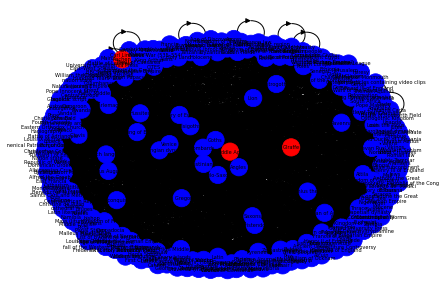

In [23]:
subplot = G.subgraph(x)

deg = subplot.degree

new_subplot = [node[0] for node in deg if node[1] > 5 or node[0] in sh_path]

new_subgraph = subplot.subgraph(new_subplot)

color_map = []

for node in new_subgraph.nodes():
    if node in sh_path:
        print(node)
        color_map.append('red')
    else:
        color_map.append('blue')
        
nx.draw(new_subgraph, pos = nx.spring_layout(new_subgraph, k = 2), with_labels=True, font_size = 5, node_color = color_map, linewidths = 0.75)
plt.savefig("graph.png", dpi = 3000)

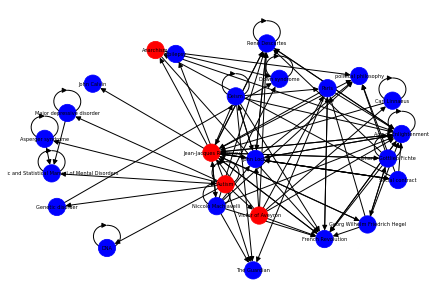

In [199]:
nx.draw(new_subgraph, pos = nx.spring_layout(new_subgraph, k = 2), with_labels=True, font_size = 5, node_color = color_map, linewidths = 0.75)
plt.savefig("graph.png", dpi = 3000)